In [1]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

Populating the interactive namespace from numpy and matplotlib


In [2]:
mnist_df = pd.read_csv("mnist-history.csv")

In [3]:
mnist_df.dropna(inplace=True)
mnist_df

,Name,Model,Preprocessing,Error,Year,Cite
0,linear classifier (1-layer NN),linear,none,12.00,1998.0,LeCun et al. 1998
1,linear classifier (1-layer NN),linear,deskewing,8.40,1994.0,Bottou et al 1994
2,pairwise linear classifier,linear,deskewing,7.60,1998.0,LeCun et al. 1998
3,"K-nearest-neighbors, Euclidean (L2)",knn,none,5.00,1998.0,LeCun et al. 1998
4,"K-nearest-neighbors, Euclidean (L2)",knn,none,3.09,2002.0,"Kenneth Wilder, U. Chicago"
5,"K-nearest-neighbors, L3",knn,none,2.83,2002.0,"Kenneth Wilder, U. Chicago"
6,"K-nearest-neighbors, Euclidean (L2)",knn,deskewing,2.40,1994.0,Bottou et al 1994
7,"K-nearest-neighbors, Euclidean (L2)",knn,"deskewing, noise removal, blurring",1.80,2002.0,"Kenneth Wilder, U. Chicago"
8,"K-nearest-neighbors, L3",knn,"deskewing, noise removal, blurring",1.73,2002.0,"Kenneth Wilder, U. Chicago"
9,"K-nearest-neighbors, L3",knn,"deskewing, noise removal, blurring, 1 pixel shift",1.33,2002.0,"Kenneth Wilder, U. Chicago"


In [4]:
model_list = mnist_df.Model.unique()
year_list = np.arange(mnist_df.Year.min(), mnist_df.Year.max() + 1, dtype=int)

record_lod = []

for model in model_list:
    for year in year_list:
        my_query = mnist_df.query(f"(Model=='{model}') & (Year <= {year})")
        if len(my_query) < 1:
            record_lod.append({
                "model": model,
                "year": year,
                "error": np.nan,
                "cite": np.nan,
            })
        else:
            min_i = my_query.Error.idxmin()
            record_lod.append({
                "model": model,
                "year": year,
                "error": my_query.loc[min_i, "Error"],
                "cite": my_query.loc[min_i, "Cite"],
            })

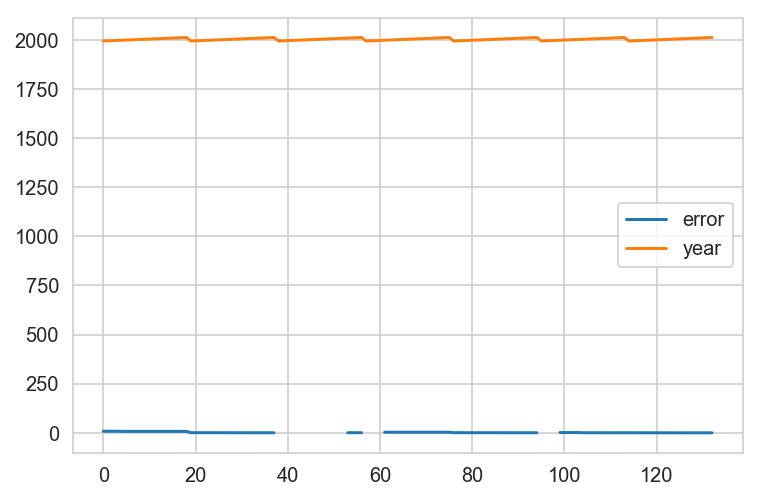

In [5]:
record_df = pd.DataFrame(record_lod)
record_df.plot.line()

In [6]:
# subrecord_df = record_df[record_df.model.isin(
#     ["knn", "convnet", "neural net", "svm"])]

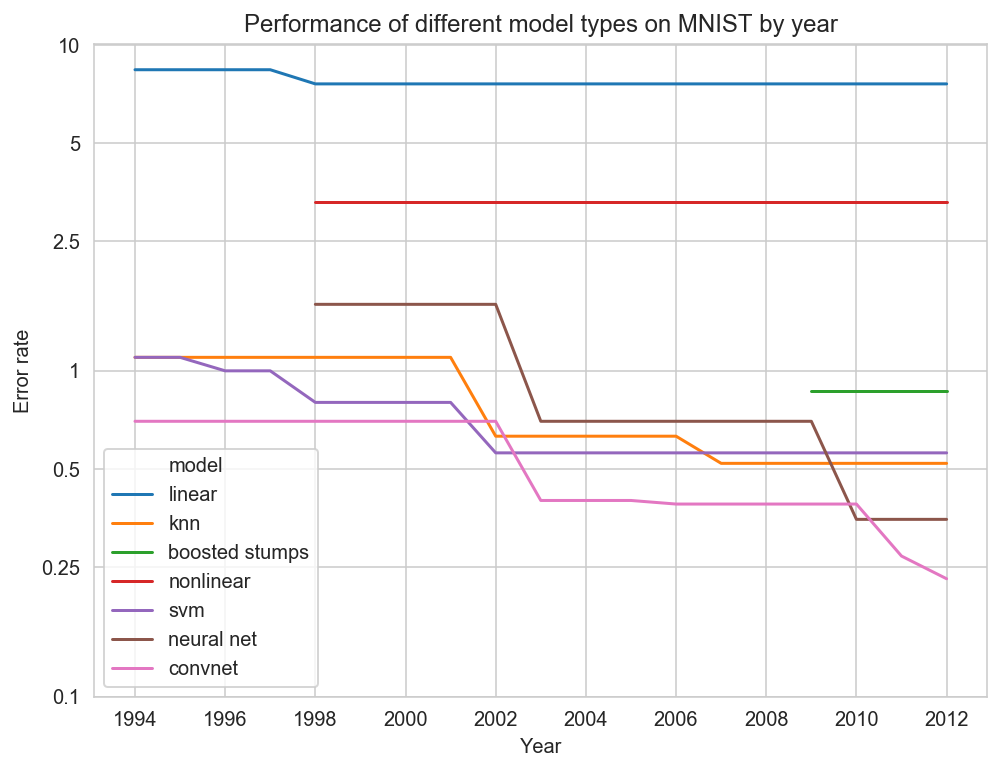

In [12]:
figsize(8,6)
sns.lineplot(x="year", y="error", hue="model", data=record_df)
plt.semilogy()
newticks = [.1, .25, .5, 1, 2.5, 5, 10]
plt.yticks(newticks, [f"{t:g}" for t in newticks]);
plt.xticks(year_list[::2], [str(y) for y in year_list[::2]])
title("Performance of different model types on MNIST by year")
ylabel("Error rate")
xlabel("Year")
savefig("mnist-history.png", dpi=200)